# 13 septembre 2023 : classification avec la méthode des moindres carrés

Inspiration :

- S. Boyd et L. Vandenberghe, *Introduction to 
Applied Linear Algebra: Vectors, Matrices, and Least Squares*, Cambridge University Press, 2018.

## Classification
Lorsqu'on fait de la classification booléenne (ou à deux classes), l'output du classificateur $\hat f$ est en général soit $+1$ (True) soit $-1$ (False). 

Pour tester les performances du classificateur, on utilise un jeu de données *qui n'a pas été utilisé pour construire celui-ci* (on l'appelle parfois *validation set*). On compare alors les labels réels $y$ du jeu de données à ceux prédits par le classificateur, $\hat y$. Il y a quatre options possibles :

- Vrai positif : $y=+1$ et $\hat y = -1$
- Vrai négatif : $y=-1$ et $\hat y = -1$
- Faux positif : $y=-1$ et $\hat y = +1$
- Faux négatif : $y=+1$ et $\hat y = -1$

On peut alors regarder, pour le jeu de données de validation, combien de vrais positifs, vrais négatifs, faux positifs et faux négatifs on a obtenu. Sur cette base, on construit la *matrice de confusion*.

### Exercice 1 : construire une matrice de confusion
Écris une fonction `build_confusion_matrix` qui prend en entrée un vecteur `y` contenant les labels réels des données et un vecteur `yhat` qui contient les labels prédits par le classificateur. Cette fonction renvoie la matrice de confusion `C`.

In [1]:
def build_confusion_matrix(y, yhat):
    ...

Écris une fonction `compute_error_rate` qui prend la matrice de confusion `C` comme argument d'entrée et qui renvoie le taux d'erreur associé, `e`. Tu peux éventuellement écrire d'autres fonctions qui calculent 

- le taux de vrais positifs (aussi appelé sensibilité) ;
- le taux de faux positifs (aussi appelé taux de fausse alerte) ;
- le taux de vrais négatifs ;
- la précision.

En fonction de l'application, on s'intéressera plus à l'une ou l'autre d'entre elles.

In [ ]:
def compute_error_rate(C):
    ...

## Le jeu de données : les fleurs d'iris
Ce jeu de données contient 150 observations réalisées sur trois espèces d’iris (l’*iris setosa*, l’*iris versicolor* et l’*iris virginica*). Chaque observation correspond à un vecteur à quatre composantes : largeur et longueur du pétale ainsi que largeur et longueur du sépale. Dans ce notebook, nous allons construire un classificateur qui permet de distinguer l'espèce *iris virginica* des deux autres espèces.

Puisque la classification est un apprentissage *supervisé*, on utilisera les *targets* (labels) présents pour chaque observation du jeu de données. 

<img align="center" src="https://kidiscience.cafe-sciences.org/wp-content/uploads/sites/13/2017/12/fleur-theorique-768x551.jpg" alt="Iris de Fisher" width="200"/>

### Exercice 2 : visualisation des données
Le jeu de données est téléchargé ci-dessous. Visualise sur une figure les 150 observations sur base de la taille des pétales (longueur des pétales en abscisses et largeur des pétales en ordonnées).
Affiche les *iris setosa* et *iris versicolor* dans la même couleur et les *iris virginica* dans une autre couleur.

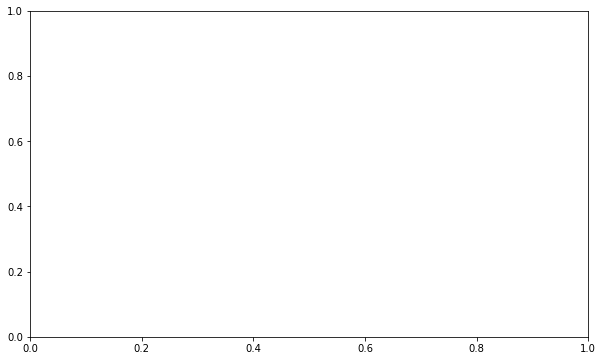

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import sklearn
from sklearn import datasets

iris = datasets.load_iris()
data = pandas.DataFrame(iris.data)
data.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pandas.DataFrame(iris.target)
y.columns = ['Targets']

# Visualisation des données
fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1,1,1)

plt.show()

## Classification
Dans ce notebook, on propose une méthode simple basée sur les moindres carrés. D'autres méthodes plus sophistiquées (et avec de meilleures performances) existent comme la régression logistique ou le *support vector machine*. 

Dans notre cas, on utilise un classificateur basé sur les moindres carrés qui fait intervenir un modèle de régression,
$$\hat f (x) = \text{sign}(x^\top \beta + v),$$
où la fonction $\text{sign}$ permet d'avoir un output valant $-1$ ou $+1$. 

Si $\beta_2$ est négatif et que $x_2$ est beaucoup plus grand que les autres entrées du vecteur $x$, quelle sera probablement la sortie du classificateur ?

...

### Exercice 3 : créer un set d'entraînement et un set de validation
Écris une fonction `create_sets` qui permet de séparer aléatoirement le jeu de données en deux jeux distincts : un contenant `N` observations et utilisé pour construire le classificateur et un autre contenant le restant des observations et utilisé pour quantifier ses performances. Les inputs de la fonction sont le jeu de données `data`, les labels `y` et l'entier `N`. La fonction renvoie les deux jeux de données `training_data` et `validation_data` ainsi que les deux vecteurs de labels `training_labels` et `validation_labels`.

In [9]:
def create_sets(data, N):
    ...
    return training_data, validation_data, training_labels, validation_labels

### Exercice 4 : résoudre l'estimation au sens des moindres carrés
On va commencer par essayer de trouver les cinq paramètres du modèle de régression (les quatre composantes de $\beta$ ainsi $v$). On souhaite trouver les paramètres qui minimisent la somme des erreurs mises au carré entre les labels prédits par le modèle et les vrais labels,
$$\text{arg\,min} \sum_{i=1}^N [y_{\text{t},i} - (x_i^\top\beta + v)]^2 = \text{arg\,min} \| y_t - A \theta\|^2,$$
où $A$ est une matrice de taille $N\times 5$ contenant les observations du set d'entraînement (et une colonne de $1$) et où $\theta = \begin{pmatrix} \beta^\top & v \end{pmatrix}^\top$.

Commence par écrire la matrice $A$.

En utilisant la fonction `np.linalg.lstsq`, résouds le problème de minimisation. Tu as obtenu de cette façon les cinq paramètres de ton modèle !

### Exercice 5 : construire le classificateur
Écris la fonction `fhat` qui représente ton classificateur. Elle prend en entrée les paramètres du modèle `beta` (un vecteur) et `v` (un scalaire), un vecteur de données à classifier `data` et elle renvoie en sortie `yhat`, un vecteur de la même longueur que `data` contenant les labels estimés.

In [ ]:
def fhat(beta, v, data):
    ...

### Exercice 6 : estimer les performances du classificateur 
À présent, teste ton classificateur sur le set de validation. Quelle est la matrice de confusion obtenue ? Comment l'interpréter ? Quel est le taux d'erreur ?

Finalement, visualise les données comme à l'exercice 2 mais uniquement pour le set de validation. Affiche les vrais labels et les labels prédits, dans deux couleurs différentes.